In [1]:
!wget https://github.com/PacktPublishing/Deep-Learning-for-Genomics-/raw/refs/heads/main/Chapter06/data/X_test.npy.zip
!wget https://github.com/PacktPublishing/Deep-Learning-for-Genomics-/raw/refs/heads/main/Chapter06/data/X_train.npy.zip
!wget https://github.com/PacktPublishing/Deep-Learning-for-Genomics-/raw/refs/heads/main/Chapter06/data/y_test.npy.zip
!wget https://github.com/PacktPublishing/Deep-Learning-for-Genomics-/raw/refs/heads/main/Chapter06/data/y_train.npy.zip

--2025-02-04 14:12:44--  https://github.com/PacktPublishing/Deep-Learning-for-Genomics-/raw/refs/heads/main/Chapter06/data/X_test.npy.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-for-Genomics-/refs/heads/main/Chapter06/data/X_test.npy.zip [following]
--2025-02-04 14:12:45--  https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-for-Genomics-/refs/heads/main/Chapter06/data/X_test.npy.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316549 (309K) [application/zip]
Saving to: ‘X_test.npy.zip’

X_test.npy.zip      100%[===================>] 309.13K  

In [2]:
!ls -lh

total 3.5M
drwxr-xr-x 1 root root 4.0K Jan 31 14:18 sample_data
-rw-r--r-- 1 root root 310K Feb  4 14:12 X_test.npy.zip
-rw-r--r-- 1 root root 3.1M Feb  4 14:12 X_train.npy.zip
-rw-r--r-- 1 root root 7.3K Feb  4 14:12 y_test.npy.zip
-rw-r--r-- 1 root root 109K Feb  4 14:12 y_train.npy.zip


In [3]:
!unzip X_test.npy.zip
!unzip X_train.npy.zip
!unzip y_test.npy.zip
!unzip y_train.npy.zip

Archive:  X_test.npy.zip
  inflating: X_test.npy              
Archive:  X_train.npy.zip
  inflating: X_train.npy             
  inflating: __MACOSX/._X_train.npy  
Archive:  y_test.npy.zip
  inflating: y_test.npy              
Archive:  y_train.npy.zip
  inflating: y_train.npy             


In [7]:
!ls -lh

total 53M
drwxr-xr-x 2 root root 4.0K Feb  4 14:14 __MACOSX
drwxr-xr-x 1 root root 4.0K Jan 31 14:18 sample_data
-rw-r--r-- 1 root root 3.9M Oct 30  2022 X_test.npy
-rw-r--r-- 1 root root 310K Feb  4 14:12 X_test.npy.zip
-rw-r--r-- 1 root root  39M Oct 30  2022 X_train.npy
-rw-r--r-- 1 root root 3.1M Feb  4 14:12 X_train.npy.zip
-rw-r--r-- 1 root root 674K Oct 30  2022 y_test.npy
-rw-r--r-- 1 root root 7.3K Feb  4 14:12 y_test.npy.zip
-rw-r--r-- 1 root root 6.6M Oct 30  2022 y_train.npy
-rw-r--r-- 1 root root 109K Feb  4 14:12 y_train.npy.zip


In [5]:
import numpy as np
from sklearn import metrics
import pandas as pd
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Layer, Input
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
# Load train features data
X_train = np.load('X_train.npy')
X_train = X_train[:10000,:]
X_train.shape

(10000, 1000, 4)

In [13]:
print(X_train)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 1 0 0]
  [0 0 1 0]
  [0 0 0 1]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [1 0 0 0]
  [0 1 0 0]
  [1 0 0 0]]

 [[0 0 0 1]
  [1 0 0 0]
  [1 0 0 0]
  ...
  [0 0 1 0]
  [0 1 0 0]
  [0 0 1 0]]

 ...

 [[0 0 1 0]
  [1 0 0 0]
  [1 0 0 0]
  ...
  [1 0 0 0]
  [0 0 0 1]
  [1 0 0 0]]

 [[0 1 0 0]
  [1 0 0 0]
  [0 0 1 0]
  ...
  [0 0 1 0]
  [0 0 0 1]
  [0 0 1 0]]

 [[0 1 0 0]
  [1 0 0 0]
  [0 1 0 0]
  ...
  [0 1 0 0]
  [0 1 0 0]
  [0 1 0 0]]]


In [16]:
# Load train labels data
y_train = np.load('y_train.npy')
y_train = y_train[:10000,:]
y_train.shape

(10000, 690)

In [17]:
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [18]:
# Load test features data
X_test = np.load('X_test.npy')
X_test = X_test[:1000,:]
X_test.shape

(1000, 1000, 4)

In [19]:
# Load test labels
y_test = np.load('y_test.npy')
y_test = y_test[:1000,:]
y_test.shape

(1000, 690)

In [26]:
input_data = Input(shape=(1000,4))

# Convolutional Layer
output = Conv1D(320,kernel_size=26,activation="relu")(input_data)
output = MaxPooling1D()(output)
output = Dropout(0.2)(output)

#BiLSTM Layer
output = Bidirectional(LSTM(320,return_sequences=True))(output)
output = Dropout(0.5)(output)

flat_output = Flatten()(output)

#FC Layer
FC_output = Dense(695)(flat_output)
FC_output = Activation('relu')(FC_output)

#Output Layer
output = Dense(690)(FC_output)
output = Activation('sigmoid')(output)

model = Model(inputs=input_data, outputs=output)

print('compiling model')
model.compile(loss='binary_crossentropy', optimizer='adam')

print('model summary')
model.summary()

checkpointer = ModelCheckpoint(filepath="/content/bilstm_model.keras", verbose=1, save_best_only=False)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(X_train, y_train, batch_size=100, epochs=2, shuffle=True, verbose=1, validation_split=0.1, callbacks=[checkpointer,earlystopper])

compiling model
model summary


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1000, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 975, 320)            │          33,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 487, 320)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 487, 320)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 487, 640)            │       1,640,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 487, 640)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 311680)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 695)                 │     216,618,295 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 695)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 690)                 │         480,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 690)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,773,095 (834.55 MB)

 Trainable params: 218,773,095 (834.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - loss: 0.1460 
Epoch 1: saving model to /content/bilstm_model.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 1994s 22s/step - loss: 0.1453 - val_loss: 0.0625
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - loss: 0.0594 
Epoch 2: saving model to /content/bilstm_model.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 2135s 24s/step - loss: 0.0594 - val_loss: 0.0576


In [27]:
!ls -lh

total 2.5G
-rw-r--r-- 1 root root 2.5G Feb  4 15:34 bilstm_model.keras
drwxr-xr-x 2 root root 4.0K Feb  4 14:14 __MACOSX
drwxr-xr-x 1 root root 4.0K Jan 31 14:18 sample_data
-rw-r--r-- 1 root root 3.9M Oct 30  2022 X_test.npy
-rw-r--r-- 1 root root 310K Feb  4 14:12 X_test.npy.zip
-rw-r--r-- 1 root root  39M Oct 30  2022 X_train.npy
-rw-r--r-- 1 root root 3.1M Feb  4 14:12 X_train.npy.zip
-rw-r--r-- 1 root root 674K Oct 30  2022 y_test.npy
-rw-r--r-- 1 root root 7.3K Feb  4 14:12 y_test.npy.zip
-rw-r--r-- 1 root root 6.6M Oct 30  2022 y_train.npy
-rw-r--r-- 1 root root 109K Feb  4 14:12 y_train.npy.zip


In [28]:
np.mean(history.history['loss'])

0.07151693105697632

In [29]:
np.mean(history.history['val_loss'])

0.060016149654984474

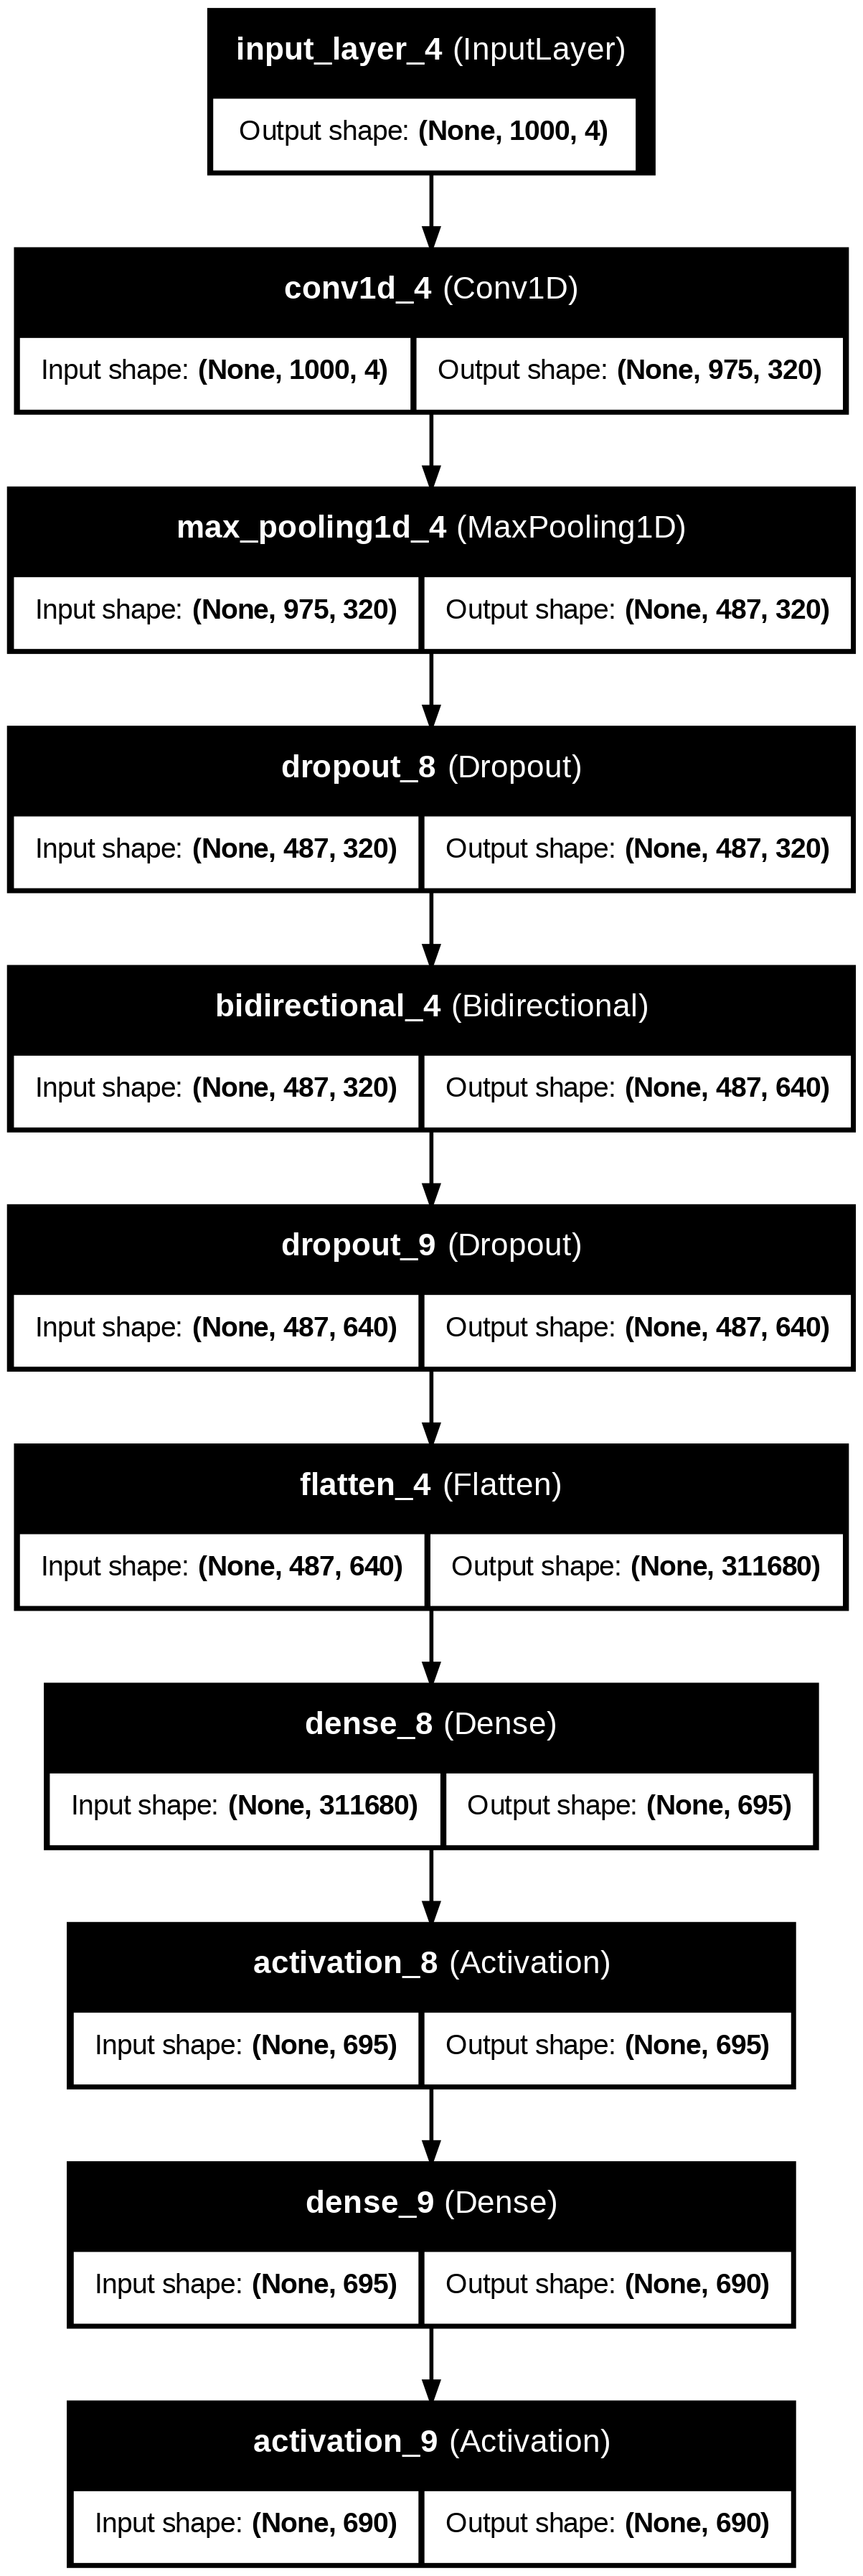

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)